In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ls ../results/muestras

kraskov_1/


In [3]:
results_folder = "../results/muestras/kraskov_1/"
gaussian_results = {}
for gaussian_i in sorted(os.listdir(results_folder)):
    gaussian_i_folder = os.path.join(results_folder, gaussian_i)
    gaussian_results[gaussian_i] = {
        "mean": [],
        "std": []
    }
    for n_data in sorted(os.listdir(gaussian_i_folder)):
        data_filepath = os.path.join(gaussian_i_folder, n_data, "results_samples.txt")
        data = np.loadtxt(data_filepath, delimiter=",")
        print(gaussian_i, n_data, data.shape, data_filepath)
        data_mean, data_std = data.mean(axis=0), data.std(axis=0)
        gaussian_results[gaussian_i]["mean"].append(data_mean)
        gaussian_results[gaussian_i]["std"].append(data_std)

gaussian_1 100 (100, 3) ../results/muestras/kraskov_1/gaussian_1/100/results_samples.txt
gaussian_1 1000 (100, 3) ../results/muestras/kraskov_1/gaussian_1/1000/results_samples.txt
gaussian_1 10000 (100, 3) ../results/muestras/kraskov_1/gaussian_1/10000/results_samples.txt
gaussian_1 100000 (100, 3) ../results/muestras/kraskov_1/gaussian_1/100000/results_samples.txt
gaussian_2 100 (100, 3) ../results/muestras/kraskov_1/gaussian_2/100/results_samples.txt
gaussian_2 1000 (100, 3) ../results/muestras/kraskov_1/gaussian_2/1000/results_samples.txt
gaussian_2 10000 (100, 3) ../results/muestras/kraskov_1/gaussian_2/10000/results_samples.txt
gaussian_2 100000 (100, 3) ../results/muestras/kraskov_1/gaussian_2/100000/results_samples.txt
gaussian_3 100 (100, 3) ../results/muestras/kraskov_1/gaussian_3/100/results_samples.txt
gaussian_3 1000 (100, 3) ../results/muestras/kraskov_1/gaussian_3/1000/results_samples.txt
gaussian_3 10000 (100, 3) ../results/muestras/kraskov_1/gaussian_3/10000/results_sam

In [4]:
!cat ../data/muestras/index.txt

%%%%% gaussian_1 %%%%%
 Cov = 
[[0.94865453 0.88980272 0.61003724]
 [0.88980272 0.87132813 0.53992065]
 [0.61003724 0.53992065 0.42064495]]

 TC_teoric = 14.942948002189445
 DTC_teoric = 24.511912843159863
 O_teoric = -9.568964840970418

%%%%% gaussian_2 %%%%%
 Cov = 
[[1.78204283 2.07617377 1.86300841]
 [2.07617377 2.4513445  2.20499211]
 [1.86300841 2.20499211 2.00137295]]

 TC_teoric = 6.553575100639645
 DTC_teoric = 3.9794005557070142
 O_teoric = 2.574174544932631

%%%%% gaussian_3 %%%%%
 Cov = 
[[1.40475223 0.71334893 1.37549918]
 [0.71334893 1.19903819 1.26390951]
 [1.37549918 1.26390951 1.88921512]]

 TC_teoric = 2.0388871614132027
 DTC_teoric = 2.0369566995937323
 O_teoric = 0.0019304618194704304

%%%%% gaussian_4 %%%%%
 Cov = 
[[1.87212591 0.92516917 1.26646562 1.61203683]
 [0.92516917 0.66260509 0.66048506 0.74277782]
 [1.26646562 0.66048506 1.17162886 0.77233538]
 [1.61203683 0.74277782 0.77233538 1.71137508]]

 TC_teoric = 10.67082646313931
 DTC_teoric = 21.14500852625021
 

In [5]:
index = {
    "gaussian_1": {
        "TC": 14.942948002189445,
        "DTC": 24.511912843159863,
        "O": -9.568964840970418
    },
    "gaussian_2": {
        "TC": 6.553575100639645,
        "DTC": 3.9794005557070142,
        "O": 2.574174544932631
    },
    "gaussian_3": {
        "TC": 2.0388871614132027,
        "DTC": 2.0369566995937323,
        "O": 0.0019304618194704304
    },
    "gaussian_4": {
        "TC": 10.67082646313931,
        "DTC": 21.14500852625021,
        "O": -10.474182063110899
    },
    "gaussian_5": {
        "TC": 8.395176965099164,
        "DTC": 4.896122181209218,
        "O": 3.499054783889946
    },
    "gaussian_6": {
        "TC": 5.263208727679152,
        "DTC": 5.265691575795344,
        "O": -0.002482848116192038
    },
    "gaussian_7": {
        "TC": 17.159413579062676,
        "DTC": 34.50341291910172,
        "O": -17.343999340039044
    },
    "gaussian_8": {
        "TC": 12.37830847121118,
        "DTC": 5.7118600127109005,
        "O": 6.66644845850028
    },
    "gaussian_9": {
        "TC": 12.882212899041042,
        "DTC": 12.886191892190169,
        "O": -0.003978993149127419
    }
}

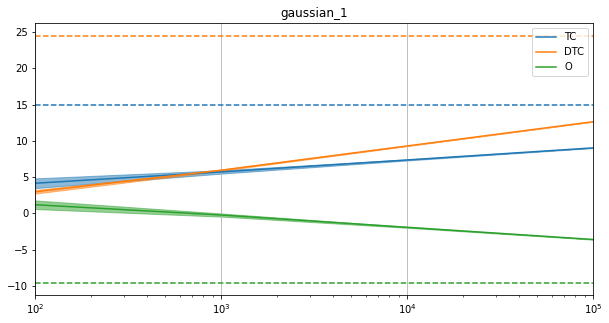

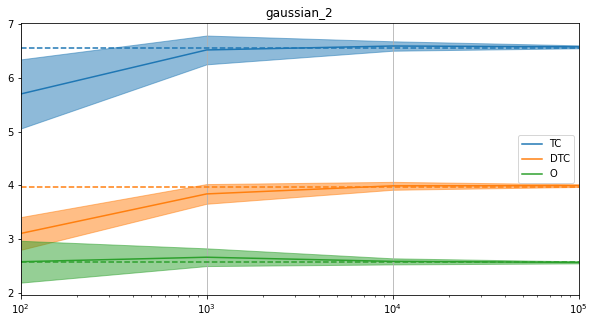

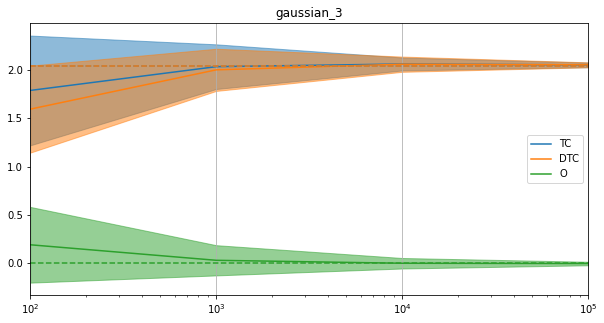

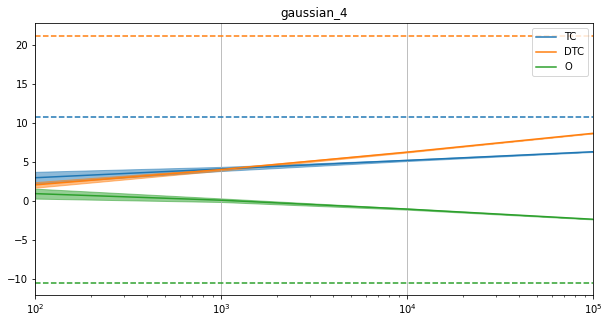

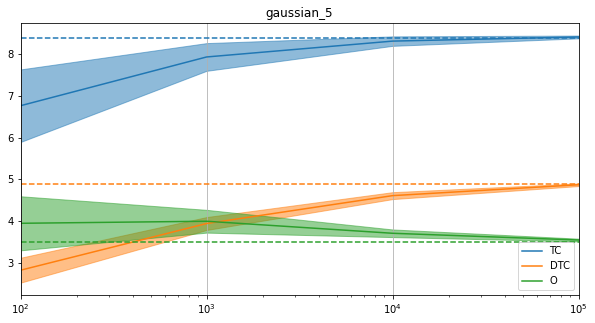

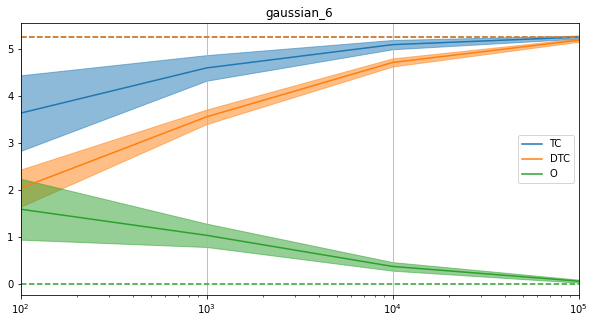

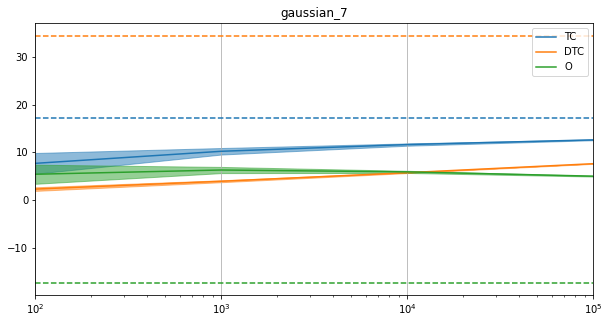

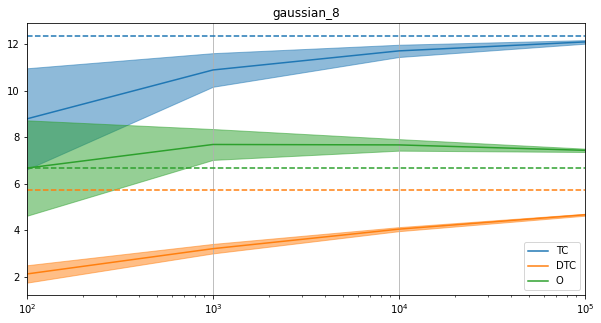

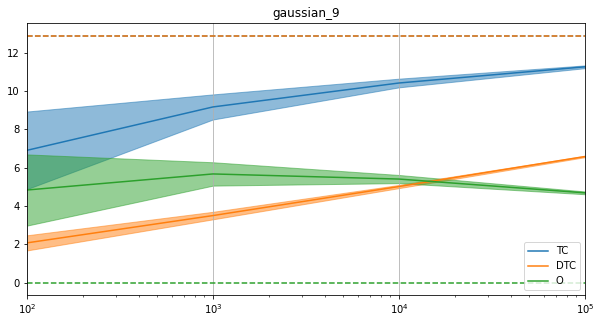

In [6]:
metrics_plot = ["TC", "DTC", "O"]
for gaussian_i in sorted(os.listdir(results_folder)):
    try:
        fig, ax = plt.subplots(figsize=(10,5))
        mean = pd.DataFrame(gaussian_results[gaussian_i]["mean"], columns=["TC", "DTC", "O"], index=[100, 1000, 10000, 100000])
        std = pd.DataFrame(gaussian_results[gaussian_i]["std"], columns=["TC", "DTC", "O"], index=[100, 1000, 10000, 100000])
        mean[metrics_plot].plot(ax=ax)
        for i, metric_plot in enumerate(metrics_plot):
            ax.fill_between(mean.index, mean[metric_plot]-3*std[metric_plot], mean[metric_plot]+3*std[metric_plot], color=f"C{i}", alpha=0.5)
            ax.axhline(y=index[gaussian_i][metric_plot], color=f'C{i}', linestyle='--')
        plt.title(gaussian_i)
        ax.set_xscale('log')
        plt.xlim(10**2, 10**5)
        plt.grid(axis="x")
        #fig.savefig(f"../results/plots/{metrics_plot}_{gaussian_i}.png")
    except:
        pass

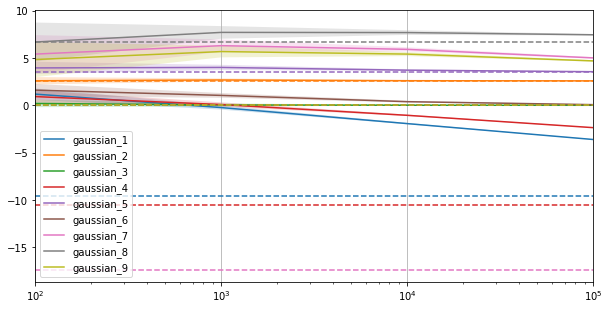

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
for i, gaussian_i in enumerate(sorted(os.listdir(results_folder))):
    try:
        mean = pd.DataFrame(gaussian_results[gaussian_i]["mean"], columns=["TC", "DTC", "O"], index=[100, 1000, 10000, 100000])
        std = pd.DataFrame(gaussian_results[gaussian_i]["std"], columns=["TC", "DTC", "O"], index=[100, 1000, 10000, 100000])
        mean = mean.rename(columns={"O": gaussian_i})
        
        mean[[gaussian_i]].plot(ax=ax)
        ax.fill_between(mean.index, mean[gaussian_i]-3*std["O"], mean[gaussian_i]+3*std["O"], alpha=0.2)
        ax.axhline(y=index[gaussian_i]["O"], color=f"C{i}", linestyle='--')
        ax.set_xscale('log')
        plt.xlim(10**2, 10**5)
        plt.grid(axis="x")
    except:
        pass

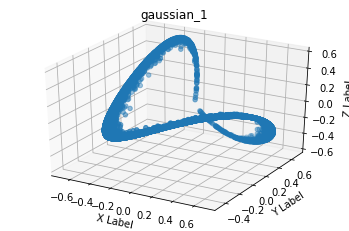

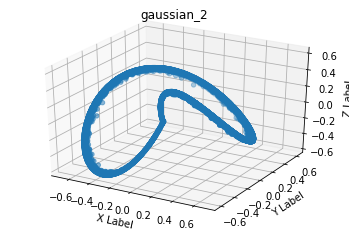

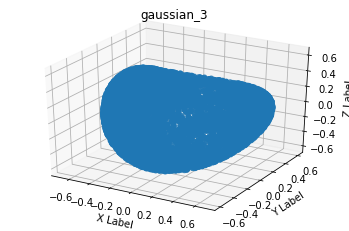

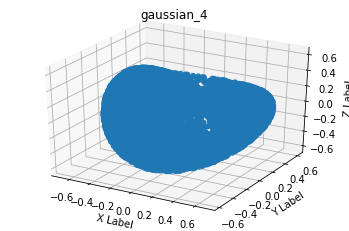

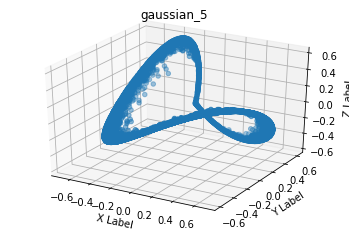

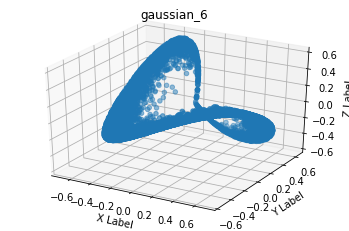

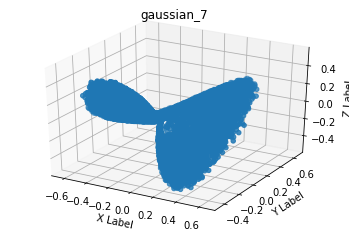

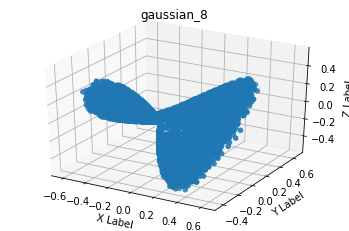

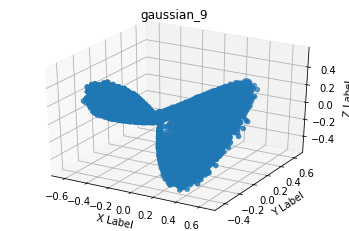

In [89]:
from sklearn.decomposition import KernelPCA

for i in range(1,10):
    samples = np.loadtxt(f"../data/muestras/gaussian_{i}/samples2.txt", comments="%")
    samples = samples[:10000]
    transformer = KernelPCA(n_components=3, kernel='rbf')
    samples_transformed = transformer.fit_transform(samples)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs = samples_transformed[:,0]
    ys = samples_transformed[:,1]
    zs = samples_transformed[:,2]
    ax.scatter(xs, ys, zs)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title(f"gaussian_{i}")